In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# <center> WINE reviews

In [44]:
# читаем датасет
data = pd.read_csv('data/wine_cleared.csv', index_col='Unnamed: 0')

## <center> 3. Проектирование признаков

In [45]:
# добавляем новый признак со значением округленной цены
data['price_round'] = data['price'].round().astype(int)

### Разбор текста

Создаем признак года происзводства, используя регулярные выражения.

In [46]:
regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)

### Разбор категорий

Признак производства в США

In [47]:
# если вино произведено в сша то 1, если нет то 0
data['is_usa'] = data['country'].apply(lambda x: 1 if x == 'US' else 0)

Признак производства во Франции и в Италии

In [48]:
data['is_france'] = data['country'].apply(lambda x: 1 if x == 'France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x == 'Italy' else 0)

Признак года переводим в формат даты

In [49]:
# преобразуем признак year в объект datetime для удобного сравнения дат
data['year'] = pd.to_datetime(data['year'], errors='coerce')

Создаем признак старости вина

In [50]:
# 1 если вино старше 2010 года
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0)

Создаем признак долины производства вина из названия

In [51]:
# Nicosia 2013 Vulkà Bianco (Etna)
# создание признака долины производства вина из названия
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)

Добавляем признак населения страны из внешнего источника

In [52]:
# читаем новый датафрейм
country_population = pd.read_csv('data/country_population.csv', sep=';')

In [53]:
# объединяем датасет с винами с датасатом со странами
data = data.join(country_population.set_index('country'), on='country')

Добавляем признак площади страны из внешнего источника

In [54]:
# читаем новый датафрейм
country_area = pd.read_csv('data/country_area.csv', sep=';')

# объединяем датасет с винами с датасатом со странами
data = data.join(country_area.set_index('country'), on='country')

Создаем признак количество дней с момента изготовления вина

In [55]:
data['years_diff'] = (pd.to_datetime('01.12.2022') - pd.to_datetime(data['year'])).dt.days

# <center> 5. Кодирование категориальных признаков  
`pip install category_encoders`  
`import category_encoders as ce`

In [56]:
import category_encoders as ce

Кодируем признак года порядковым кодированием

In [57]:
# признак кода переводем в str
data['year'] = data['year'].dt.year.round().astype(str, errors='ignore')

In [59]:
# ord_encoder = ce.OrdinalEncoder()
# year_col = ord_encoder.fit_transform(data[['year']])
# data = pd.concat([data, year_col], axis=1)

Кодируем признак обозначающий имя сомелье

In [64]:
encoder = ce.OneHotEncoder(cols=['taster_name']) # указываем столбец для кодирования
names_bin = encoder.fit_transform(data['taster_name'])
# data = pd.concat([data, names_bin], axis=1)

,taster_name_1,taster_name_2,taster_name_3,taster_name_4,taster_name_5,taster_name_6,taster_name_7,taster_name_8,taster_name_9,taster_name_10,taster_name_11,taster_name_12,taster_name_13,taster_name_14,taster_name_15,taster_name_16,taster_name_17,taster_name_18,taster_name_19,taster_name_20
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129967,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129968,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
129969,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Вернёмся к нашему примеру с винным датасетом. Признак country содержит много уникальных значений — используем двоичную кодировку признака.

In [68]:
encoder = ce.BinaryEncoder(cols=['country'])
country_bin = encoder.fit_transform(data['country'])

country_bin

,country_0,country_1,country_2,country_3,country_4,country_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,0,1,1
4,0,0,0,0,1,1
...,...,...,...,...,...,...
129966,0,0,0,1,1,0
129967,0,0,0,0,1,1
129968,0,0,0,1,0,1
129969,0,0,0,1,0,1


определите подходящий способ кодирования признака `taster_twitter_handle` из датасета винных обзоров и закодируйте его.

In [79]:
ecnoder = ce.BinaryEncoder(cols=['taster_twitter_handle'])
twit_bins = encoder.fit_transform(data['taster_twitter_handle'])

twit_bins

,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


Нормлализуем признак price

<AxesSubplot:title={'center':'Исходное распределение цены'}, xlabel='price', ylabel='Count'>

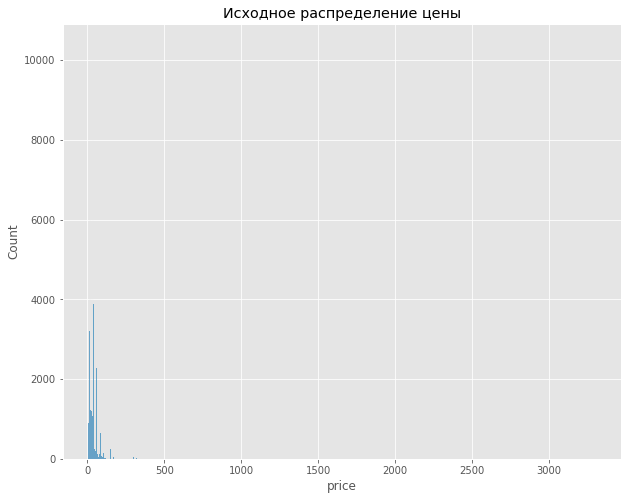

In [84]:
# импортируем модуль из библиотеки
from sklearn import preprocessing

# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Исходное распределение цены')

sns.histplot(data['price'], ax=ax1, label ='price')

Так как данные распределены не нормально и имеются выбросы, то мы проводим нормализацию с использованием метода Robustscaler

In [96]:
# создаем элемент класса
scaler = preprocessing.RobustScaler()

# копируем датафрейм
scale_df = scaler.fit_transform(data[['price']])

scale_df = pd.DataFrame(scale_df, columns=['price'])

In [91]:
scale_df['price'].sum()

43500.77493697044

Стандартизируем исходный признак price

In [98]:
s_scaler = preprocessing.StandardScaler()

stand_df = s_scaler.fit_transform(data[['price']])

stand_df = pd.DataFrame(stand_df, columns=['price'])
stand_df['price'][129968]

1.001514868120814